In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Commands

In [36]:
# DarkPhotonComb process_channels -i input/v2 -c VBFchannel,ZHchannel,ggFchannel -o output/process --minimizer_options config/minimizer/default.json --config config/process_channels/modify_ws_v2.yaml --do-limit --skip-likelihood --unblind
# DarkPhotonComb combine_workspaces -i output/process -c VBFchannel,ggFchannel --minimizer_options config/minimizer/default.json --scheme config/correlation/correlation_v2.json --do-limit --skip-likelihood

In [3]:
import os
import json
from quickstats.plots import UpperLimit1DPlot
from matplotlib.ticker import LogLocator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<a id="section-toc"></a>
### Table of Contents
- [Check limit results](#section-limit-results)
- [Discriminant plot](#section-plot)


<a id="check-limit-results"></a>
# Check limit results
[back to ToC](#section-toc)

In [54]:
basedir = os.environ['basedir']
def json_to_google(input_json):
    df = pd.read_json(input_json)
    return df

In [55]:
version = 'v2'
channel = 'combined/A-VBF_ZH-nocorr'
input_json = os.path.join(basedir, f'output/{version}/limits/{channel}/limits.json')
df = json_to_google(input_json)

In [56]:
cols = ['mass', 'obs', '0', '-2', '-1', '1', '2']
df[cols].set_index('mass')

obs         0        -2        -1         1         2
mass                                                            
0     0.013505  0.014571  0.007821  0.010499  0.020801  0.028161

<a id="section-plot"></a>
# Discriminat plots
[back to ToC](#section-toc)

In [178]:
from limit_plotting import *
status = 'int'

/tmp/zhangr/ipykernel_25823/3174644264.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_limit_SM(sm_limit_df,suffix,status, plotdir)


Switch to VBF paper results


<Figure size 432x288 with 0 Axes>

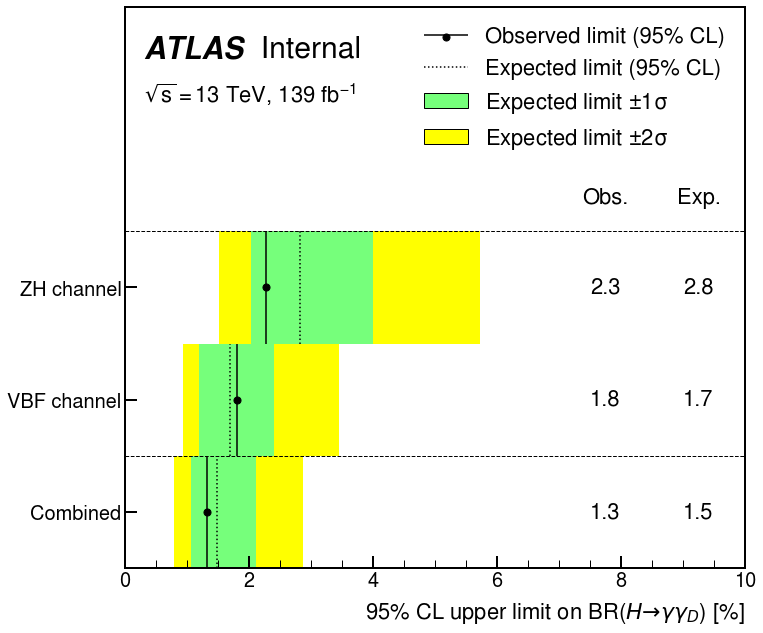

Save to /afs/cern.ch/user/z/zhangr/work/HHcomb/DarkPhotonCombination/output/v2/figures/int/limit/limit_mu.pdf


In [179]:
output_dir = os.environ['basedir'] + '/output/v2'
plotdir = output_dir+'/figures/'
combine_tags = ['A-VBF_ZH-fullcorr']

for combine_tag in combine_tags:
    suffix = ''
    if 'nocorr' in combine_tag:
        suffix = '_nocorr'
    sm_limit_df = get_limit_data(channels = 'VBF,ZH', scale_factor=100, output_dir=output_dir, combine_tag=combine_tag)
    plot_limit_SM(sm_limit_df,suffix,status, plotdir)


save to /afs/cern.ch/user/z/zhangr/work/HHcomb/DarkPhotonCombination/output/v7e_13FEB_flatSyst35_corr/figures/int/limit/limit_BSM__withindiv_int.pdf


<Figure size 432x288 with 0 Axes>

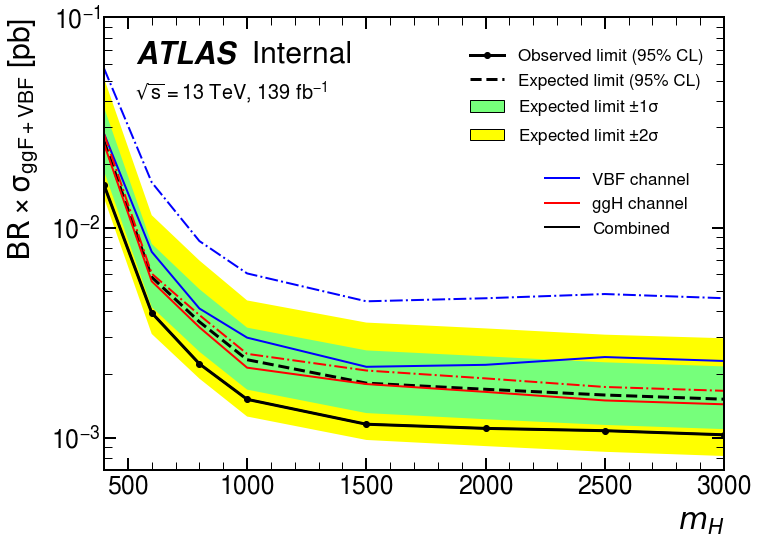

In [187]:
output_dir = os.environ['basedir'] + '/output/v7e_13FEB_flatSyst35_corr'
plotdir = output_dir+'/figures/'
combine_tags = ['A-VBF_ggH-fullcorr']

for combine_tag in combine_tags:
    suffix = ''
    if 'nocorr' in combine_tag:
        suffix = '_nocorr'
    df = get_limit_scan(channels = 'VBF,ggH', scale_factor=1, output_dir=output_dir, combine_tag=combine_tag)
    plot_xsection_scan(df, status=status, output_dir=plotdir)